# 1. Importing Libraries:
The code starts by installing and importing necessary libraries, including TensorFlow, NumPy, and Matplotlib.

In [1]:
pip install tensorflow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# 2. Loading and Preprocessing Data:
The CIFAR-10 dataset is loaded, containing 50,000 training images and 10,000 test images of 32x32 pixels in 10 different classes.
Pixel values are normalized to be between 0 and 1.
The class labels are one-hot encoded using to_categorical.

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Building the CNN Model:
A sequential model is created.
Convolutional and pooling layers are added to capture hierarchical features from the input images.
The model ends with dense layers for classification, using the softmax activation for multiclass classification.

In [6]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

2023-11-17 12:29:08.554585: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-17 12:29:08.554602: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-17 12:29:08.554609: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-17 12:29:08.554636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 12:29:08.554651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# 4. Compiling and Training the Model:
The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.
The model is trained on the training data for 10 epochs.

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-11-17 12:29:09.470477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 13ms/step - loss: 1.5284 - accuracy: 0.4429 - val_loss: 1.2269 - val_accuracy: 0.5561
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1955 - accuracy: 0.5792 - val_loss: 1.1234 - val_accuracy: 0.6063
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2007 - accuracy: 0.5852 - val_loss: 1.3614 - val_accuracy: 0.5677
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4062 - accuracy: 0.5607 - val_loss: 1.3607 - val_accuracy: 0.5744
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.1858 - accuracy: 0.5155 - val_loss: 2.4484 - val_accuracy: 0.5233
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 4.2831 - accuracy: 0.4866 - val_loss: 6.2773 - val_accuracy: 0.4857
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 11.2490 - accuracy: 0.4504 - val_loss: 10.7099 - val_accu

# 5. Model Evaluation:
The trained model is used to predict the classes on the test set.
Classification metrics (F1 score) and overall accuracy are calculated using the scikit-learn library.

In [9]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


# 6. Displaying Results:
The code generates a plot showing 10 random images from each class with their actual and predicted labels.
The F1 score for each class is also displayed on the side. Note that class_names is not defined in the provided code; it seems to be missing.

/Users/rakib/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakib/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakib/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r


F1 Score:
              precision    recall  f1-score   support

    airplane       0.40      0.27      0.32      1000
  automobile       0.55      0.25      0.34      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.35      0.01      0.01      1000
         dog       0.14      0.92      0.25      1000
        frog       0.41      0.12      0.19      1000
       horse       0.13      0.01      0.01      1000
        ship       0.32      0.62      0.43      1000
       truck       0.35      0.04      0.07      1000

    accuracy                           0.22     10000
   macro avg       0.27      0.22      0.16     10000
weighted avg       0.27      0.22      0.16     10000

Total Loss: 4182.53564453125
Accuracy: 0.2231999933719635


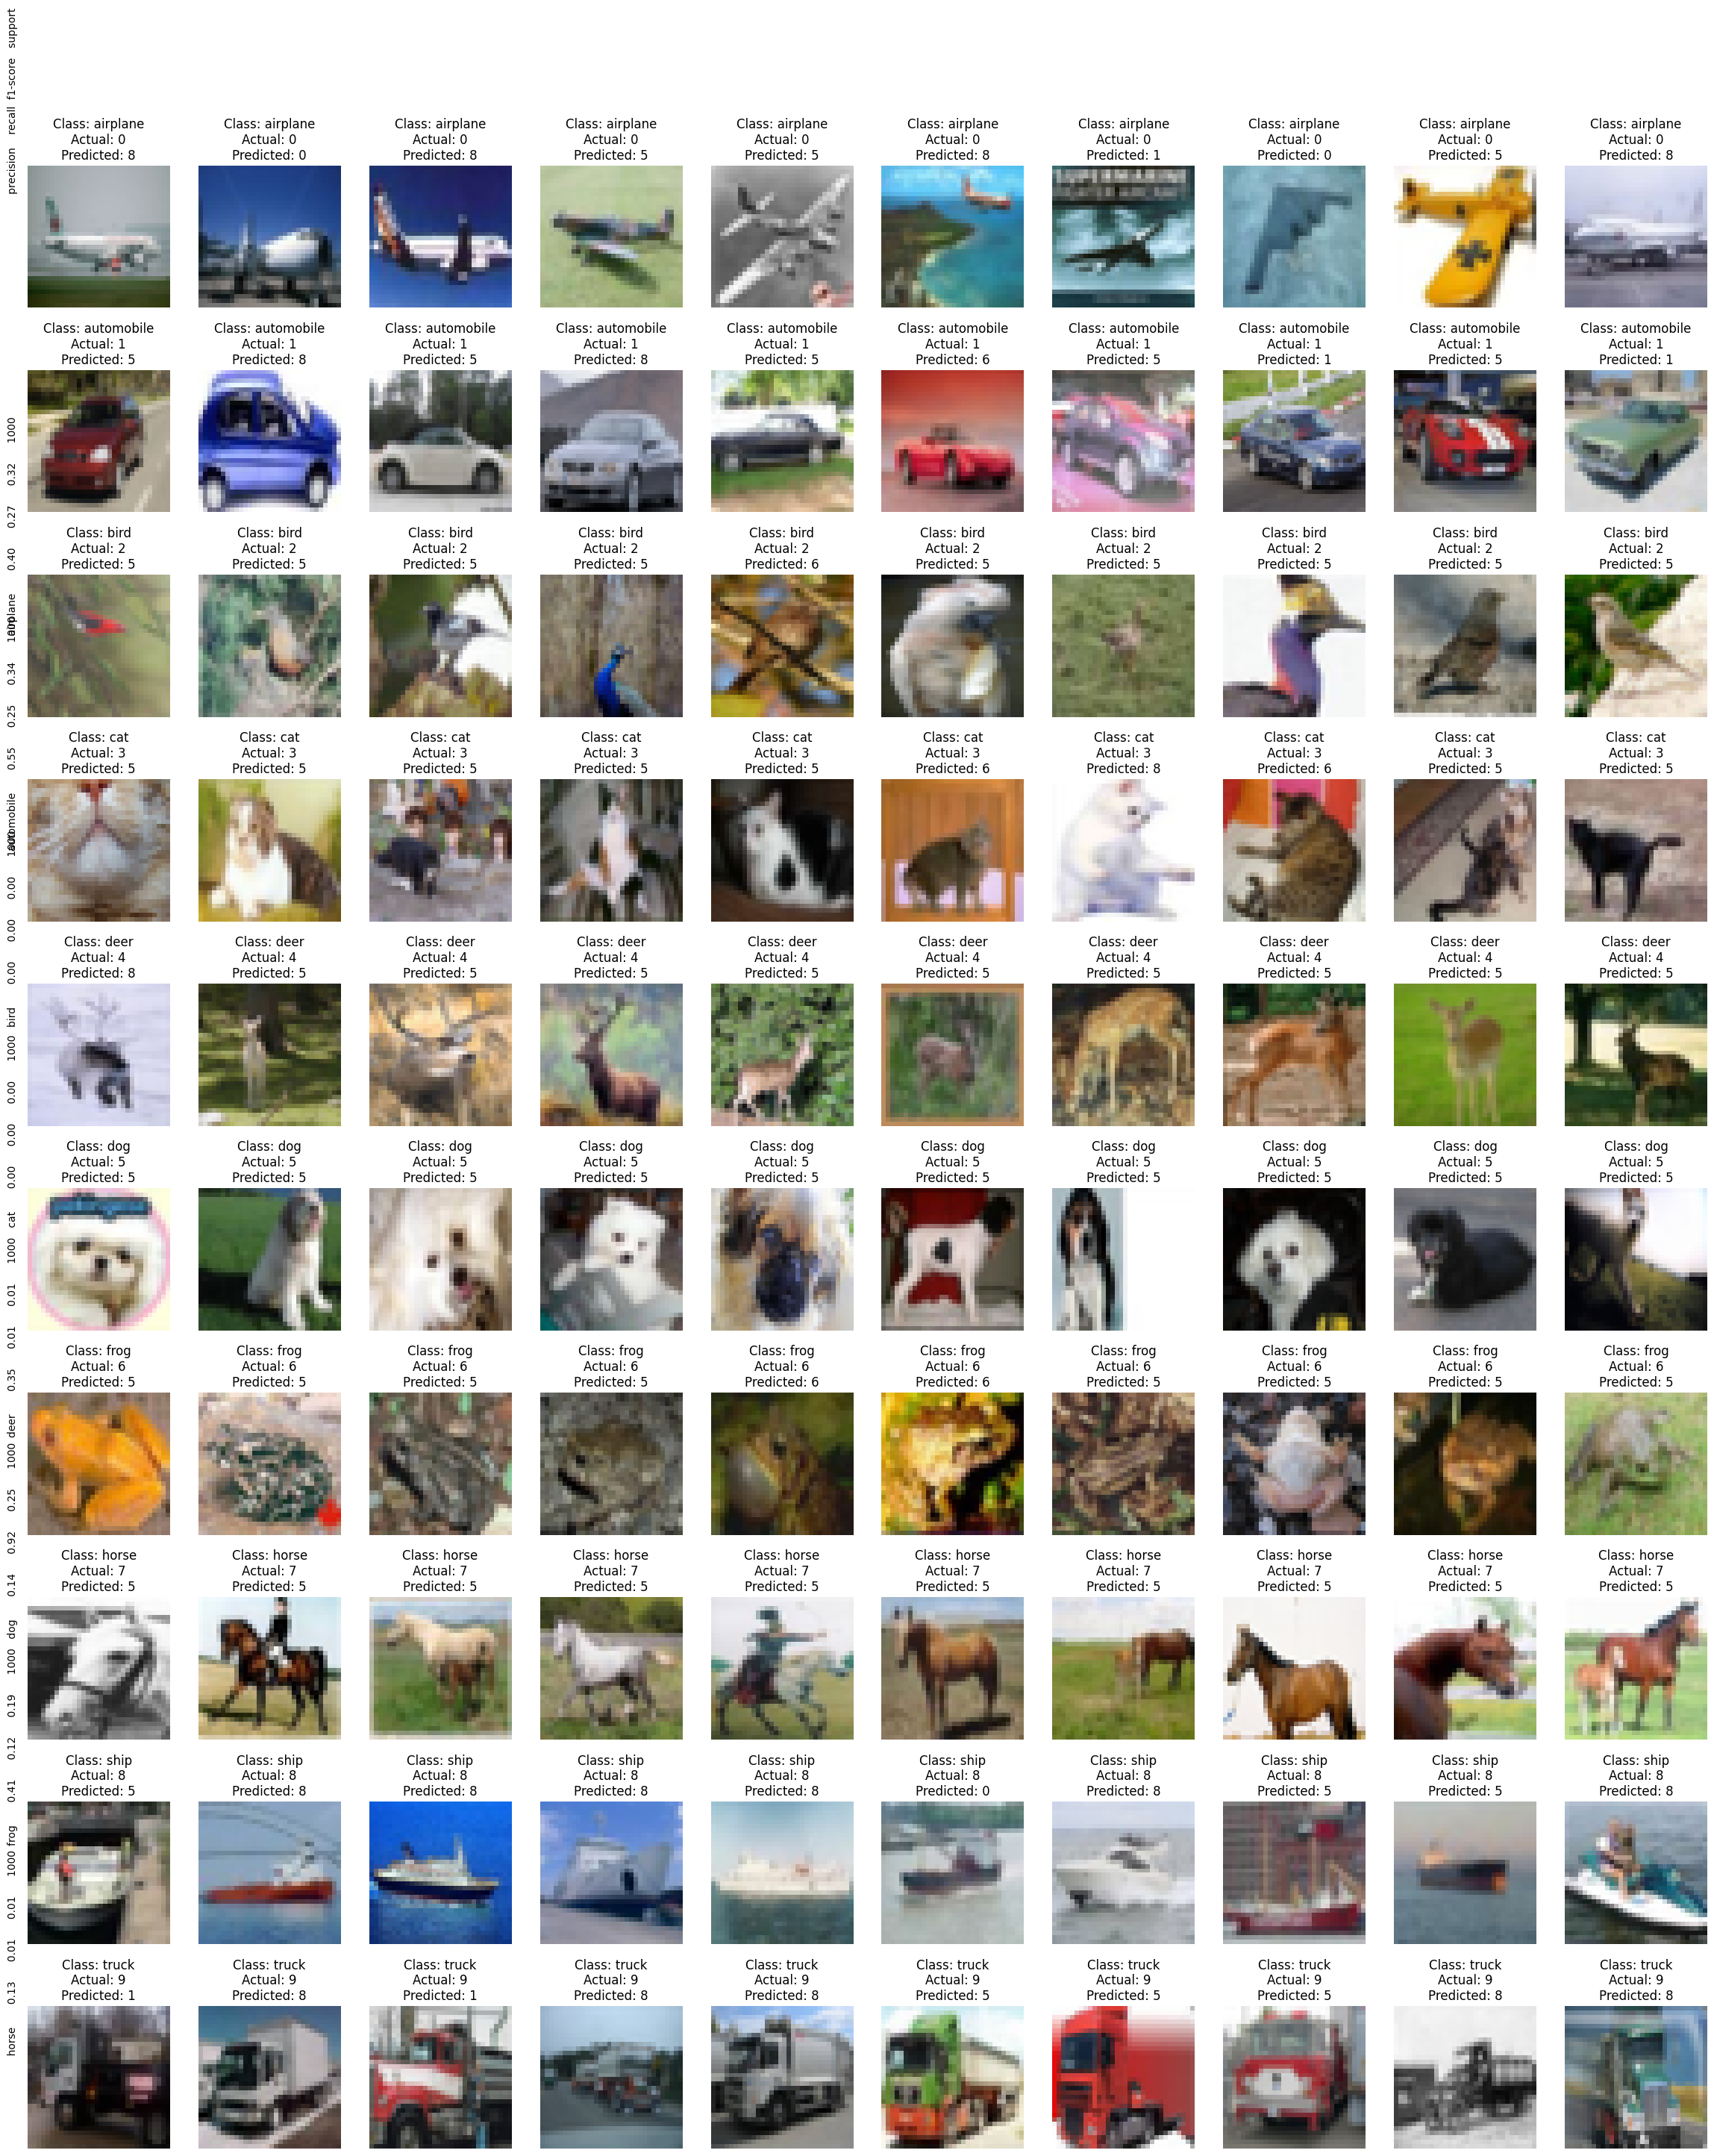

In [10]:
# Calculate metrics
f1 = classification_report(y_test_classes, y_pred_classes, target_names=[
                            "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
total_loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Map class indices to class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


print(f"\nF1 Score:\n{f1}")
print(f"Total Loss: {total_loss}")
print(f"Accuracy: {accuracy}")

# Show 10 random images with their predicted and actual categories
plt.figure(figsize=(32, 35))

for i in range(10):
    # Select indices of images belonging to the current class
    class_indices = np.where(y_test_classes == i)[0]
    
    # Randomly select 10 indices from the class
    random_indices = np.random.choice(class_indices, size=10, replace=False)
    
    for j, index in enumerate(random_indices):
        plt.subplot(10, 11, i * 11 + j + 1)
        if j == 0:
            plt.text(-5, -10, f"{f1.splitlines()[i]}", rotation=90, verticalalignment='center')
        plt.imshow(x_test[index])
        plt.title(f"Class: {class_names[i]}\nActual: {y_test_classes[index]}\nPredicted: {y_pred_classes[index]}")
        plt.axis('off')

plt.show()